## Speedrunning


### I want to start by just making some simple requests to the API and seeing if I can get back some data

In [37]:
speedrunurl = 'https://www.speedrun.com/api/v1'

In [168]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import datetime

# test = requests.get(speedrunurl + '/games', params={'name':'Super Mario 64'})

# print(test.json()['data'])

### above it does return data, going to try and get leaderboards for SM64 and convert it to a PD

In [39]:
sm64_leaderboard_url = 'https://www.speedrun.com/api/v1/leaderboards/o1y9wo6q/category/wkpoo02r'

leaderboard = requests.get(sm64_leaderboard_url)
leaderboard = leaderboard.json()

## creating DF for SM 64 120 star world record speed run

In [242]:
# print(leaderboard['data']['runs'])

places = []
users = []
times = []
dates = []
platforms = []

runs = leaderboard['data']['runs']

for run in runs:
    specific_run = run['run']
    # print(specific_run['players'][0]['id'] == None)
    user = specific_run['players'][0]['id'] if 'id' in specific_run['players'][0] else (specific_run['players'][0]['name'] if 'name' in specific_run['players'][0] else '')
    time = specific_run['times']['primary_t']
    date = specific_run['submitted']
    platform = specific_run['system']['platform']


    places.append(run['place'])
    users.append(user)
    times.append(time)
    platforms.append(platform)
    dates.append(date)

sm64df = pd.DataFrame({
    'place': places,
    'player': users,
    'speed_run_time': times,
    'console': platforms,
    'date_achieved': dates
})

sm64df.head(20)


,place,player,speed_run_time,console,date_achieved
0,1,jn32931x,5728,w89rwelk,2024-11-04T05:39:48Z
1,2,zxzk1q9x,5730,w89rwelk,2025-03-18T23:22:54Z
2,3,j2ylqn68,5752,w89rwelk,2025-06-14T16:07:07Z
3,4,kjprmwk8,5762,w89rwelk,2024-07-07T17:33:13Z
4,5,1xyd46wx,5793,w89rwelk,2025-05-01T21:52:00Z
5,6,8wkzer38,5804,w89rwelk,2024-05-16T04:38:07Z
6,6,v814mkp8,5804,w89rwelk,2024-06-12T23:32:21Z
7,8,v81ddq38,5818,w89rwelk,2025-04-30T14:37:36Z
8,9,jo2mr9n8,5823,w89rwelk,2023-10-22T09:45:36Z
9,10,zx77v7rx,5826,w89rwelk,2024-09-29T17:44:24Z


In [246]:
totalRecords = len(sm64df)
fastest_player = sm64df['player'].value_counts().idxmax()
fastest_time = sm64df['speed_run_time'].min()
avg_speedrun = sm64df['speed_run_time'].mean()


print(f'Total Records: {totalRecords}')
print(f'Fastest Player {fastest_player} with time {fastest_time}s')
print(f'Avg run time {round(avg_speedrun, 2)}s')




Total Records: 1282
Fastest Player jn32931x with time 5728s
Avg run time 8742.66s


## Top Speed Time Runs

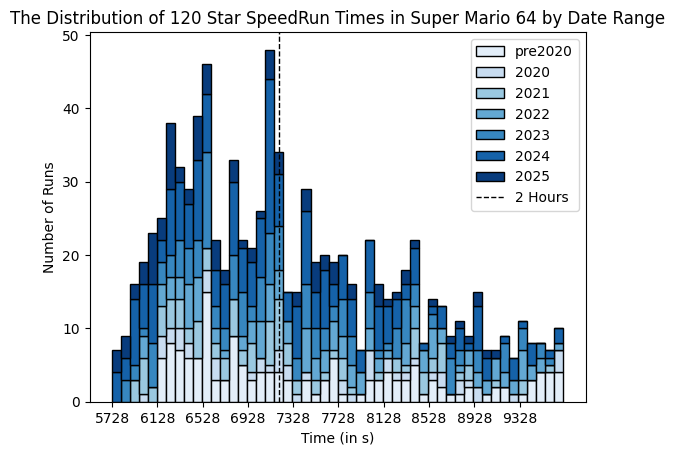

In [244]:
sm64df_top1000 = sm64df[:1001]
players = sm64df_top1000['player']
times = sm64df_top1000['speed_run_time']
avg_speedrun_top_1000 = sm64df_top1000['speed_run_time'].mean()
dates = sm64df_top1000['date_achieved']
ticks = np.arange(min(times), max(times), 400)

dates = pd.to_datetime(dates, format='mixed').dt.date

# date range bounds
d2020 = datetime.date(2020, 1, 1)
d2021 = datetime.date(2021, 1, 1)
d2022 = datetime.date(2022, 1, 1)
d2023 = datetime.date(2023, 1, 1)
d2024 = datetime.date(2024, 1, 1)
d2025 = datetime.date(2025, 1, 1)
d2026 = datetime.date(2026, 1, 1)

# mask_pre2020 = dates < d2020
mask_pre20 = sm64df_top1000[(dates < d2020)]
mask_2020 = sm64df_top1000[(dates < d2021) & (dates >= d2020)]
mask_2021 = sm64df_top1000[(dates < d2022) & (dates >= d2021)]
mask_2022 = sm64df_top1000[(dates < d2023) & (dates >= d2022)]
mask_2023 = sm64df_top1000[(dates < d2024) & (dates >= d2023)]
mask_2024 = sm64df_top1000[(dates < d2025) & (dates >= d2024)]
mask_2025 = sm64df_top1000[(dates < d2026) & (dates >= d2025)]


grouped_speedrun_times = [mask_pre20['speed_run_time'],mask_2020['speed_run_time'], mask_2021['speed_run_time'], mask_2022['speed_run_time'], mask_2023['speed_run_time'], mask_2024['speed_run_time'], mask_2025['speed_run_time']]
grouped_labels = ['pre2020', '2020', '2021', '2022', '2023', '2024', '2025']
colors = plt.cm.Blues(np.linspace(0.1, 0.95, 7))



plt.hist(grouped_speedrun_times, bins=50, color=colors, edgecolor='black', label=grouped_labels, stacked=True)
plt.title('The Distribution of 120 Star SpeedRun Times in Super Mario 64 by Date Range')
plt.xlabel('Time (in s)')
plt.ylabel('Number of Runs')
plt.xticks(ticks=ticks)
plt.axvline(x=7200, color='black', linestyle='--', linewidth=1, label='2 Hours')
plt.legend()
plt.show()

## Normal Distribution of the top 1000 Speed Run Times for 120 Star Run in Super Mario 64

7345.893106893107


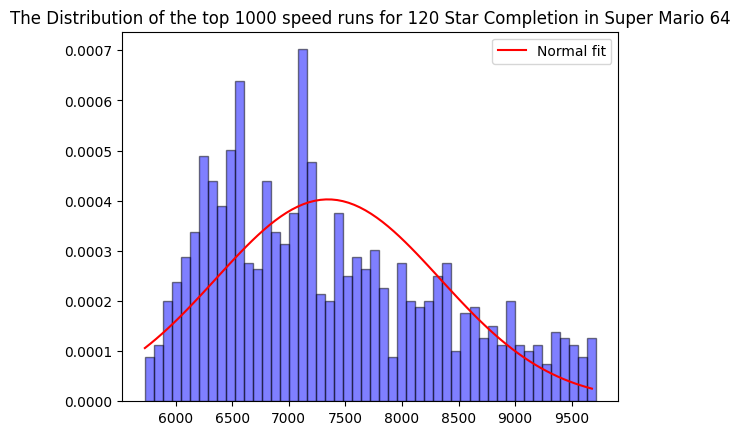

In [245]:
mean_times = sm64df_top1000['speed_run_time'].mean()
std_times = sm64df_top1000['speed_run_time'].std()
dates_achieved = sm64df_top1000['date_achieved']
print(mean_times)



plt.hist(times, bins=50, color='blue', density=True, alpha=0.5, edgecolor='black')
xplots = np.arange(min(times), max(times), 50)
plt.plot(xplots, norm.pdf(xplots, mean_times, std_times), 'r-', label='Normal fit')
plt.title('The Distribution of the top 1000 speed runs for 120 Star Completion in Super Mario 64')

plt.legend()
plt.show()

## Cumulative Distribution function

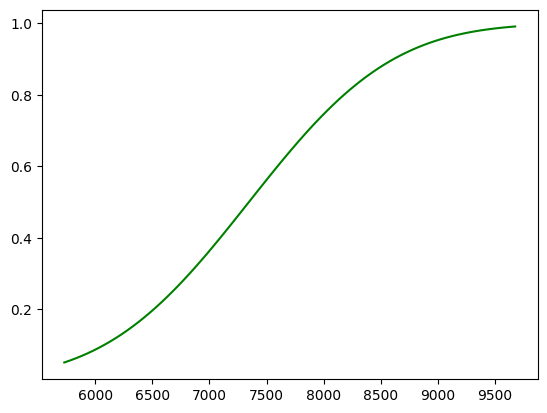

In [152]:
my_cdf = norm.cdf(xplots, mean_times, std_times)
plt.plot(xplots, my_cdf, color='green')
plt.show()

## Next get name of console and then check to see if there is a relationship between console and 